In [1]:
%pylab inline
import scipy.io
from sklearn import svm
from sklearn import metrics
DEBUG=False
digit_data_test = scipy.io.loadmat("data/digit-dataset/test.mat")
digit_data_train = scipy.io.loadmat("data/digit-dataset/train.mat")

test_img= digit_data_test['test_images']
train_img= digit_data_train['train_images']
train_label= digit_data_train['train_labels']
# Code written by Kunal Marwaha on Piazza
import math
#benchmark.m, converted
def benchmark(pred_labels, true_labels):
    errors = pred_labels != true_labels
    err_rate = sum(errors) / float(len(true_labels))
    indices = errors.nonzero()
    return err_rate, indices
#montage_images.m, converted
def montage_images(images):
    num_images=min(1000,np.size(images,2))
    numrows=math.floor(math.sqrt(num_images))
    numcols=math.ceil(num_images/numrows)
    img=np.zeros((numrows*28,numcols*28));
    for k in range(num_images):
        r = k % numrows
        c = k // numrows
        img[r*28:(r+1)*28,c*28:(c+1)*28]=images[:,:,k];
    return img

Populating the interactive namespace from numpy and matplotlib


# __Problem 1.__

##### Train a linear SVM using raw pixels as features. Plot the error rate on a validation set versus the number of training ex- amples that you used to train your classifier. Make sure you set aside 10,000 training images as a validation set. The number of training ex- amples in your experiment should be 100, 200, 500, 1,000, 2,000, 5,000, and 10,000. At this stage, you should expect accuracies between 70% and 90%.


In [2]:
#Flatten the 28x28 images into 784 pixel long vectors 
train_img_flat=[]
for i in np.arange(shape(train_img)[2]):
    train_img_flat.append(train_img[:,:,i].flatten())
train_img_flat1= np.array(train_img_flat)

To debug and verify that the data partitioning is preserves a fairly uniform number of sample for each digit, I plot the histogram of the labels to visually verify that the histogram is approximately flat (i.e. uniform).

Setting aside 10,000 images for validation 

Since this data is sorted , we need to pick randomly from the sample 

In [3]:
#get a list of 10100 unique random numbers for indexing 
N=1000
num_verification = 10000
s = set()
while len(s) < N+num_verification:
    s.add(random.randint(60000))
rand_idx=np.array(list(s))
np.random.shuffle(rand_idx)

In [4]:
train_subset = []
labels_subset = []
for i in rand_idx[:N]:
    train_subset.append(train_img_flat[i])
    labels_subset.append(train_label[:,0][i])
train_subset = np.array(train_subset)
labels_subset = np.array(labels_subset)
if (DEBUG) : print shape(train_subset)
if (DEBUG) :print shape(labels_subset)

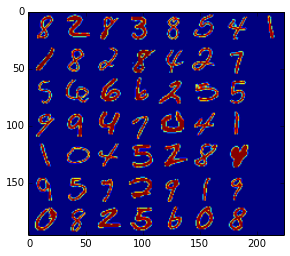

In [5]:
plt.imshow(montage_images(train_subset.T.reshape((28,28,1000))[:,:,:50]))

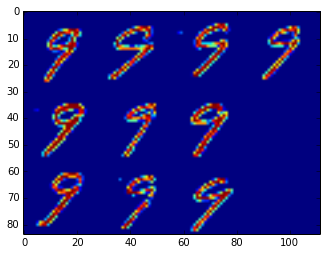

In [6]:
plt.imshow(montage_images(train_img[:,:,-10:]))

In [7]:
#Creating 10000 verification subset 
verify_train_subset = []
verify_labels_subset = []
for i in rand_idx[N:num_verification+N]:
    verify_train_subset.append(train_img_flat[i])
    verify_labels_subset.append(train_label[:,0][i])
verify_train_subset = np.array(verify_train_subset)
verify_labels_subset = np.array(verify_labels_subset)
if (DEBUG) : print shape(verify_train_subset)
if (DEBUG) :print shape(verify_labels_subset)

In [8]:
clf = svm.LinearSVC()
clf.fit(train_subset,labels_subset)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='l2', multi_class='ovr', penalty='l2',
     random_state=None, tol=0.0001, verbose=0)

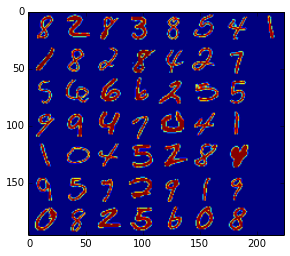

In [9]:
plt.imshow(montage_images(train_subset.T.reshape((28,28,1000))[:,:,:50]))

In [10]:
def check_classifier(i):
    fig, ax = subplots(figsize=(2,2))
    ax.imshow(verify_train_subset[i].reshape((28,28)))
    print clf.predict(verify_train_subset[i])

In [11]:
def check_classifier(i):
    fig, ax = subplots(figsize=(2,2))
    ax.imshow(train_img[:,:,i])
    print clf.predict(train_img[:,:,i].reshape(784,))

[8]
[4]
[5]
[0]
[6]
[5]


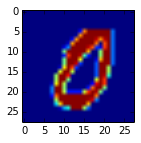

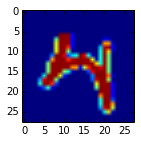

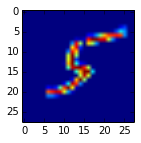

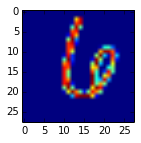

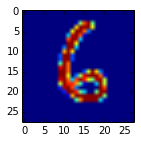

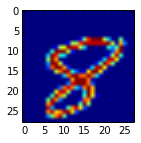

In [12]:
check_classifier(10)
check_classifier(30000)
check_classifier(35000)
check_classifier(38720)
check_classifier(41000)
check_classifier(51000)

In [13]:
result = clf.predict(verify_train_subset)
print shape(verify_labels_subset)
print shape(result)

(10000,)
(10000,)


(0, 100)

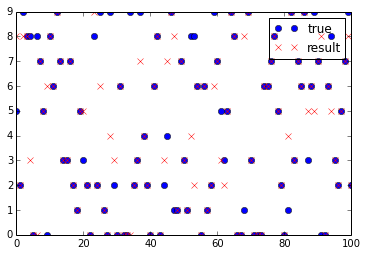

In [14]:
plt.plot(verify_labels_subset,'o',label="true")
plt.plot(result,'x',color="red",label="result")
plt.legend()
plt.xlim(0,100)

In [15]:
digit_data_test = scipy.io.loadmat("data/digit-dataset/test.mat")
digit_data_train = scipy.io.loadmat("data/digit-dataset/train.mat")

test_img= digit_data_test['test_images']
train_img= digit_data_train['train_images']
train_label= digit_data_train['train_labels']
def q1(N,DEBUG=False):
    #Flatten the 28x28 images into 784 pixel long vectors 
    train_img_flat=[]
    for i in np.arange(shape(train_img)[2]):
        train_img_flat.append(train_img[:,:,i].flatten())
    train_img_flat= np.array(train_img_flat)
    #get a list of 10100 unique random numbers for indexing 
#     N=1000
    num_verification = 10000
    s = set()
    while len(s) < N+num_verification:
        s.add(random.randint(60000))
    rand_idx=np.array(list(s))
    np.random.shuffle(rand_idx)
    if (DEBUG):print len(rand_idx) 
    #Creating N number of Training set/Labels 
    train_subset = []
    labels_subset = []
    for i in rand_idx[:N]:
        train_subset.append(train_img_flat[i])
        labels_subset.append(train_label[:,0][i])
    train_subset = np.array(train_subset)
    labels_subset = np.array(labels_subset)
    if (DEBUG) : print shape(train_subset)
    if (DEBUG) :print shape(labels_subset)
    #Creating 10000 verification subset 
    verify_train_subset = []
    verify_labels_subset = []
    for i in rand_idx[N:num_verification+N]:
        verify_train_subset.append(train_img_flat[i])
        verify_labels_subset.append(train_label[:,0][i])
    verify_train_subset = np.array(verify_train_subset)
    verify_labels_subset = np.array(verify_labels_subset)
    if (DEBUG) : print shape(verify_train_subset)
    if (DEBUG) :print shape(verify_labels_subset)
    #Training SVM classifier
    clf = svm.SVC(kernel='linear')
    clf.fit(train_subset,labels_subset)
    result = clf.predict(verify_train_subset)
    if (DEBUG):
        plt.plot(verify_labels_subset,'o',label="true")
        plt.plot(result,'x',color="red",label="result")
        plt.legend()
        plt.xlim(0,100)
    error_rate = benchmark(result,verify_labels_subset)[0]
    wrong_labels = benchmark(result,verify_labels_subset)[1][0]
    print ("N={}".format(N))
    conf_mat = metrics.confusion_matrix(verify_labels_subset,result)
    print("Confusion matrix:\n%s" % conf_mat)
    plot_confusion_matrix(conf_mat, title="Confusion Matrix N={}".format(N))
    return error_rate

In [16]:
err_lst = []
trainset_size = [100, 200, 500, 1000, 2000, 5000]
for i in trainset_size:
    err_lst.append(q1(i))

N=100


NameError: global name 'metrics' is not defined

In [ ]:
plt.plot(trainset_size,np.array(err_lst),'o')
plt.plot(trainset_size,np.array(err_lst),'-')
plt.xlabel("Train set size",fontsize=14)
plt.ylabel("Error rate",fontsize=14)
plt.title("Q #1 Error dependence on train set size")

# __Problem 2.__

##### Create confusion matrices2 for each experiment in Problem 1. Color code and report your results. You may use built-in implementations to generate confusion matrices. What insights can you get about the performance of your algorithm from looking at the confusion matrix?

The confusion matrix is a 10x10 matrix since we have 10 features (numbers 0~9). We see very strong central diagonals because those indicate the number of datapoints that have their predicted classiciation the same as the same as the actual label from the verification dataset, this indicates that are classifier is doing a good job. As the sample size increases, we see that the non-diagonal elements have a lower and lower value (more yellower in my colormap), this is because the non-diagonal elements indicate that the labels and predicted labels don't correspond. We find that there are less misclassifications as the training set increases. Confusion Matrix for each training test size is plotted above. 

In [17]:
def plot_confusion_matrix(conf_mat, title='Confusion matrix'):
    plt.figure()
    plt.imshow(conf_mat, interpolation='nearest', cmap= plt.cm.YlOrRd)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, tick_marks, rotation=45)
    plt.yticks(tick_marks, tick_marks)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')